In [1]:
# Budget Analysis

In [2]:
# Evironment Setup

In [11]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [25]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True)) 

In [26]:
# Set environment variables from the .env file
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9


True

In [13]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [6]:
# Create Client Object

In [64]:
# Create client object
client =plaid.Client(client_id =PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, environment="sandbox")

In [27]:
# Set the institution id
INSITUTION_ID = "ins_109508"

In [29]:
# Create the public token
create_response = client.Sandbox.public_token.create(
    INSITUTION_ID,
    ["transactions", "income", "assets"]
)

# Print the public token
pretty_print_response(create_response)

{
    "public_token": "public-sandbox-40662eec-41e7-4bd3-86cb-d277cfcd76c8",
    "request_id": "mV3VPJQN2AZZaBh"
}


In [30]:
# Exchange Public Token for Access Token
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_response["public_token"])

# Print the access toke
pretty_print_response(exchange_response) 

{
    "access_token": "access-sandbox-e618972a-a22b-4d01-a69b-b7b3abaf10eb",
    "item_id": "1GJdk9QKmrIrKz6goJgNfpDyD1GV3xt5lqvwV",
    "request_id": "8vmuRRy5xr3vXSS"
}


In [31]:
# Store access token as variable in a Python environment
access_token = exchange_response['access_token']

In [ ]:
# Fetch Accounts

In [32]:
# Retrieve accounts
accounts = client.Accounts.get(access_token)

# Print accounts
pretty_print_response(accounts) 

{
    "accounts": [
        {
            "account_id": "J8kvr7JA9dsdvym6le6ASqWKNmo5axTdqNz5E",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "kGw3K8vLkXI95vdmMQmoFL8RzWK9MxuWKRM89",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

In [33]:
# Account Transactions with Plaid

In [65]:
# In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of
# transactions. You will need to complete the following steps:
# Use the access token to fetch the transactions for the last 90 days
# Print the categories for each transaction type
# Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category.
# (For categories with more than one label, just use the first category label in the list)
# Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)
# Note: Results may vary from solution images due to the api call date and the data available at that time

#Ferch the Transactions for the last 90 days

In [38]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
pretty_print_response(transactions_response["transactions"][:1]) 

[
    {
        "account_id": "J8kvr7JA9dsdvym6le6ASqWKNmo5axTdqNz5E",
        "account_owner": null,
        "amount": 6.33,
        "authorized_date": null,
        "category": [
            "Travel",
            "Taxi"
        ],
        "category_id": "22016000",
        "date": "2020-07-27",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Uber",
        "name": "Uber 072515 SF**POOL**",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },

In [39]:
# Print the categories for each transaction

In [40]:
# Create a for-loop to print the categories for each transaction
for transaction in transactions_response["transactions"]:
    print(transaction["category"]) 

['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel'

In [42]:
# Create a new DataFrame using the following fields from the json transaction data: date, name, amount, category

#(For categories with more than one label just use the first category label in the list)

In [43]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transaction_df = pd.DataFrame(columns=["date", "name", "amount", "category"])

# Retrieve all the transactions
transactions = transactions_response["transactions"]

# Populate the transactions DataFrame with the transactions data
for index, transaction in enumerate(transactions):
    transaction_df.loc[index] = [transaction["date"], transaction["name"], transaction["amount"], transaction["category"][0]]

# Display sample data from the DataFrame    
transaction_df.head() 

,date,name,amount,category
0,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
1,2020-07-24,Tectra Inc,500.00,Food and Drink
2,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2020-07-23,KFC,500.00,Food and Drink
4,2020-07-23,Madison Bicycle Shop,500.00,Shops


In [45]:
# Convert the data type to the appropriate type (datetimeindex for the date and float for the amount)

In [46]:
# Display data types
transaction_df.dtypes 

date         object
name         object
amount      float64
category     object
dtype: object

In [47]:
# Make any required data type transformation
transaction_df["amount"] = transaction_df["amount"].astype("float")
transaction_df["date"] = pd.to_datetime(transaction_df["date"], format="%Y-%m-%d") 

In [48]:
# Set the date column as index
transaction_df = transaction_df.set_index("date")

# Display sample data
transaction_df.tail() 

,name,amount,category
date,,,
2020-05-12,McDonald's,12.00,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-04-30,United Airlines,500.00,Travel


In [49]:
# Income Analysis with Plaid

In [50]:
# In this section, you will use the Plaid Sandbox to complete the following:

#Determine the previous year's gross income and print the results

#Determine the current monthly income and print the results

#Determine the projected yearly income and print the results

In [51]:
# Fetch the income data
income_response = client.Income.get(access_token)

# Print the income data
pretty_print_response(income_response) 

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "n3MRbbc7OIelSnF"
}


In [52]:
# Determine the previous year's gross income and print the results
print(f"Last Year's income: {income_response['income']['last_year_income_before_tax']}") 

Last Year's income: 7285


In [53]:
# Determine the current monthly income and print the results
print(f"Current monthly income: {income_response['income']['income_streams'][0]['monthly_income']}") 

Current monthly income: 500


In [54]:
# Determine the projected yearly income and print the results
print(f"Projected Year's income: {income_response['income']['projected_yearly_income_before_tax']}") 

Projected Year's income: 7389


In [55]:
# Budget Analysis

In [56]:
#In this section, you will use the transactions DataFrame to analyze the customer's budget

#Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

#Generate a bar chart with the number of transactions for each category

#Calulate the expenses per month

#Plot the total expenses per month

In [57]:
# Calculate the expenses per category

In [58]:
# Compute the total expenses per category
totals_by_category = transaction_df.groupby("category").sum()["amount"]

# Display the expenses per catefory
totals_by_category

category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

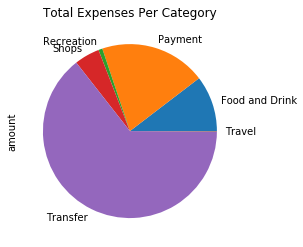

In [59]:
# Create a spending categories pie chart.
totals_by_category.plot.pie(title="Total Expenses Per Category") 

In [60]:
# Calculate the expenses per month

In [62]:
# Create a DataFrame with the total expenses
transactions_per_month = transaction_df.reset_index()
transactions_per_month["month"] = pd.DatetimeIndex(transactions_per_month["date"]).month
transactions_per_month = transactions_per_month.groupby("month").sum()

# Display sample data
transactions_per_month 

,amount
month,
4,500.00
5,10645.24
6,10645.24
7,10145.24


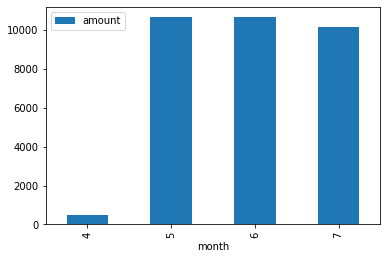

In [63]:
# Create a spending per month bar chart
# Note - though 90 days of data is called, it is possible for only one month to be represented 
# This could result in as few as one bar in the final plot
transactions_per_month.plot.bar()